In [3]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '/Users/sunny/Desktop/Final Year Project/Dataset/chest_xray'

# Create a DataFrame from the list of files in the directory
files = os.listdir(path)
df = pd.DataFrame(files, columns=['Files'])

# Print the DataFrame
print(df)

        Files
0   .DS_Store
1        test
2  chest_xray
3       train
4         val


In [5]:
dict_ = {'train': [], 'test': [], 'val': []}

# Populate the dictionary with image counts
for i in tqdm(['train', 'test', 'val']):
    path_ = os.path.join(path, i)
    for j in os.listdir(path_):
        subpath = os.path.join(path_, j)
        # Check if the current item is a directory
        if os.path.isdir(subpath):
            # Count the number of images within the subdirectory
            dict_[i].append(len(os.listdir(subpath)))

# Create a DataFrame from the dictionary
df = pd.concat({k: pd.Series(v) for k, v in dict_.items()}, axis=1)

# Display the DataFrame
print(df)


100%|██████████| 3/3 [00:00<00:00, 93.20it/s]

   train  test  val
0   3875   390    8
1   1341   234    8


In [6]:
#Size
def Size(folder):
    #Initialize an empty list to store the sizes of the images
    size=[]
    #Join the input folder name with the current working directory
    path_=os.path.join(path,folder)
    #Iterate over all the files and directories in the folder
    for i in tqdm(os.listdir(path_)):
        #Get the path to the current file or directory
        path2=os.path.join(path_,i)
        #If the current file or directory is a directory, iterate over all the files in that directory
        if os.path.isdir(path2):
            for j in os.listdir(path2):
                #Read the image file
                img=cv2.imread(os.path.join(path2,j))
                #Append the shape of the image to the size list
                size.append(img.shape)
    #Convert the size list into a pandas Series and return it
    return pd.Series(size)

In [7]:
#Define the Size function
def Size(folder):
    #Initialize an empty list to store the sizes of the images
    size = []
    #Join the input folder name with the current working directory
    path_ = os.path.join(path, folder)
    #Iterate over all the files and directories in the folder
    for i in tqdm(os.listdir(path_)):
        #Get the path to the current file or directory
        path2 = os.path.join(path_, i)
        #Check if the current item is a directory
        if os.path.isdir(path2):
            #If it is, iterate over all the files in that directory
            for j in os.listdir(path2):
                #Read the image file
                img = cv2.imread(os.path.join(path2, j))
                #Append the shape of the image to the size list
                size.append(img.shape)
    #Convert the size list into a pandas Series and return it
    return pd.Series(size)

In [8]:
# calculating the size of train
Size('train')

100%|██████████| 3/3 [00:31<00:00, 10.37s/it]


0        (736, 1048, 3)
1         (672, 984, 3)
2         (712, 992, 3)
3        (888, 1224, 3)
4         (480, 864, 3)
             ...       
5211    (2025, 2338, 3)
5212    (1259, 1654, 3)
5213    (1391, 1762, 3)
5214    (1020, 1450, 3)
5215    (1429, 1862, 3)
Length: 5216, dtype: object

In [9]:
Size('test')

100%|██████████| 3/3 [00:03<00:00,  1.02s/it]


0       (808, 1120, 3)
1       (696, 1040, 3)
2       (544, 1016, 3)
3        (608, 976, 3)
4       (768, 1168, 3)
            ...       
619    (1442, 1724, 3)
620     (824, 1168, 3)
621    (2074, 2380, 3)
622     (936, 1336, 3)
623    (1688, 1960, 3)
Length: 624, dtype: object

In [10]:
Size('val')

100%|██████████| 3/3 [00:00<00:00, 33.07it/s]


0      (864, 1256, 3)
1      (656, 1016, 3)
2      (952, 1192, 3)
3       (592, 968, 3)
4      (664, 1152, 3)
5      (712, 1072, 3)
6      (944, 1416, 3)
7     (1128, 1664, 3)
8     (1225, 1632, 3)
9     (1104, 1240, 3)
10    (1416, 1736, 3)
11     (928, 1288, 3)
12    (1040, 1272, 3)
13    (1104, 1328, 3)
14    (1302, 1564, 3)
15    (1416, 1776, 3)
dtype: object

In [11]:
Size = 80
images = []
labels = []
label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}  # Adjust labels as needed

def load():
    global images
    global labels
    for folder in tqdm(['train', 'test', 'val']):
        path_ = os.path.join(path, folder)
        for label in os.listdir(path_):
            label_path = os.path.join(path_, label)
            # Check if the current item is a directory
            if os.path.isdir(label_path):
                for img in os.listdir(label_path):
                    image = cv2.imread(os.path.join(label_path, img))
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (Size, Size))
                    image = image / 255.0
                    images.append(image)
                    labels.append(label_dict[label])

load()

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
indices = np.arange(images.shape[0])
np.random.shuffle(indices)

images = images[indices]
labels = labels[indices]


100%|██████████| 3/3 [00:33<00:00, 11.13s/it]


In [12]:
print('Images Shape :',images.shape)
print('Labels Shape :',labels.shape)

Images Shape : (5856, 80, 80, 3)
Labels Shape : (5856,)


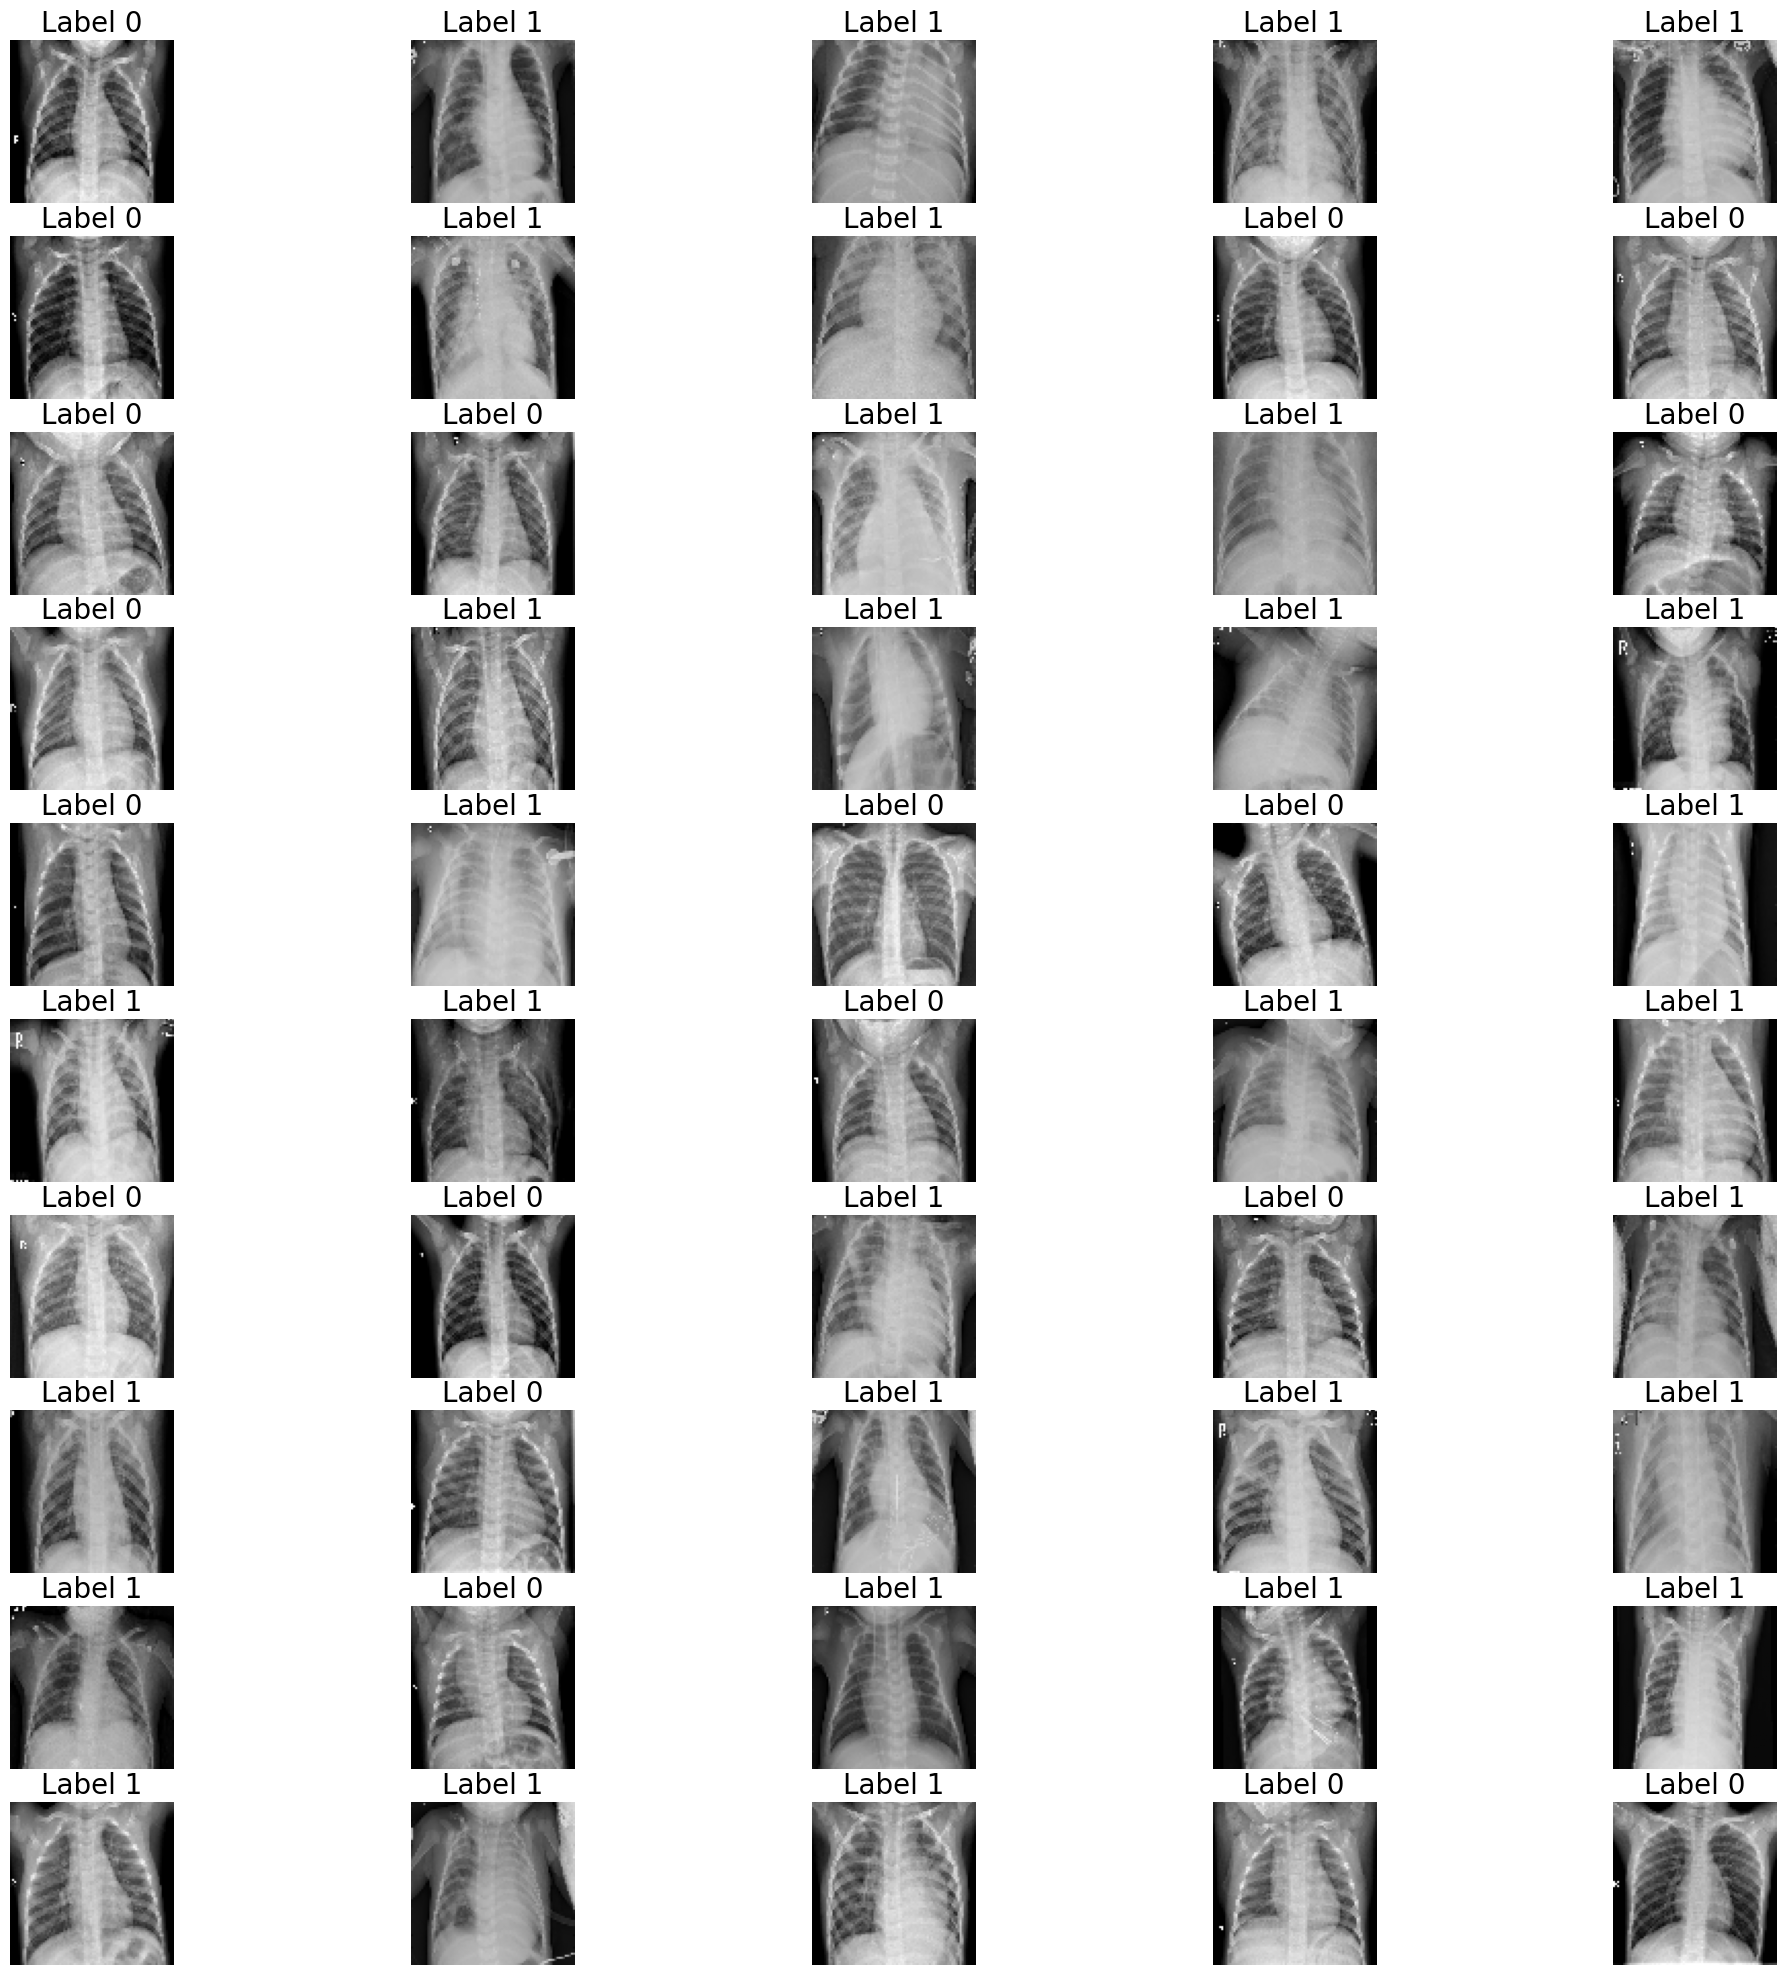

In [13]:

plt.figure(figsize=(25,25))
x = 1
for i in np.random.randint(0,len(images),50):
    plt.subplot(10, 5, x)
    plt.imshow(images[i])
    plt.title(f'Label {labels[i]}', fontsize=20)
    plt.axis('off')    
    x += 1

In [14]:
label=LabelEncoder()
labels=label.fit_transform(labels)
labels

array([1, 0, 0, ..., 1, 1, 1])

In [15]:
X_train, X_test2, y_train, y_test2 = train_test_split(images, labels, test_size=0.30, random_state=44, shuffle =True)
X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.50, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4099, 80, 80, 3)
X_val shape is  (878, 80, 80, 3)
X_test shape is  (879, 80, 80, 3)
y_train shape is  (4099,)
y_val shape is  (878,)
y_test shape is  (879,)


# CNN MODEL

In [16]:
class_num=1
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3)))  
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))

In [17]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Corrected file path extension to .keras
checkpoint_cb = ModelCheckpoint("cnn_model.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.8051 - loss: 0.6046 - val_accuracy: 0.7118 - val_loss: 3.6618
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9189 - loss: 0.2175 - val_accuracy: 0.7118 - val_loss: 6.0221
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9461 - loss: 0.1612 - val_accuracy: 0.7437 - val_loss: 1.0325
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9499 - loss: 0.1401 - val_accuracy: 0.9487 - val_loss: 0.1784
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9443 - loss: 0.1526 - val_accuracy: 0.7187 - val_loss: 2.5647
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9455 - loss: 0.1513 - val_accuracy: 0.9636 - val_loss: 0.1223
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.9602 - loss: 0.0990 - val_accuracy: 0.9317 - val_loss: 0.1905
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9658 - loss: 0

In [19]:
score, acc = model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9520 - loss: 0.1612
Test Loss = 0.13432683050632477
Test Accuracy = 0.9567690491676331


In [20]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.872896,0.368834,0.711845,3.661795
1,0.920468,0.215124,0.711845,6.022127
2,0.942669,0.163475,0.743736,1.032505
3,0.944621,0.149127,0.948747,0.178397
4,0.948768,0.142353,0.718679,2.564706
5,0.949988,0.131072,0.963554,0.122312
6,0.958770,0.114776,0.931663,0.190497
7,0.963894,0.107161,0.781321,0.403445
8,0.961454,0.109515,0.834852,0.419172
9,0.962430,0.108742,0.838269,0.352204


In [21]:
prediction = model.predict(X_test)
prediction[0]

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([0.09814339], dtype=float32)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


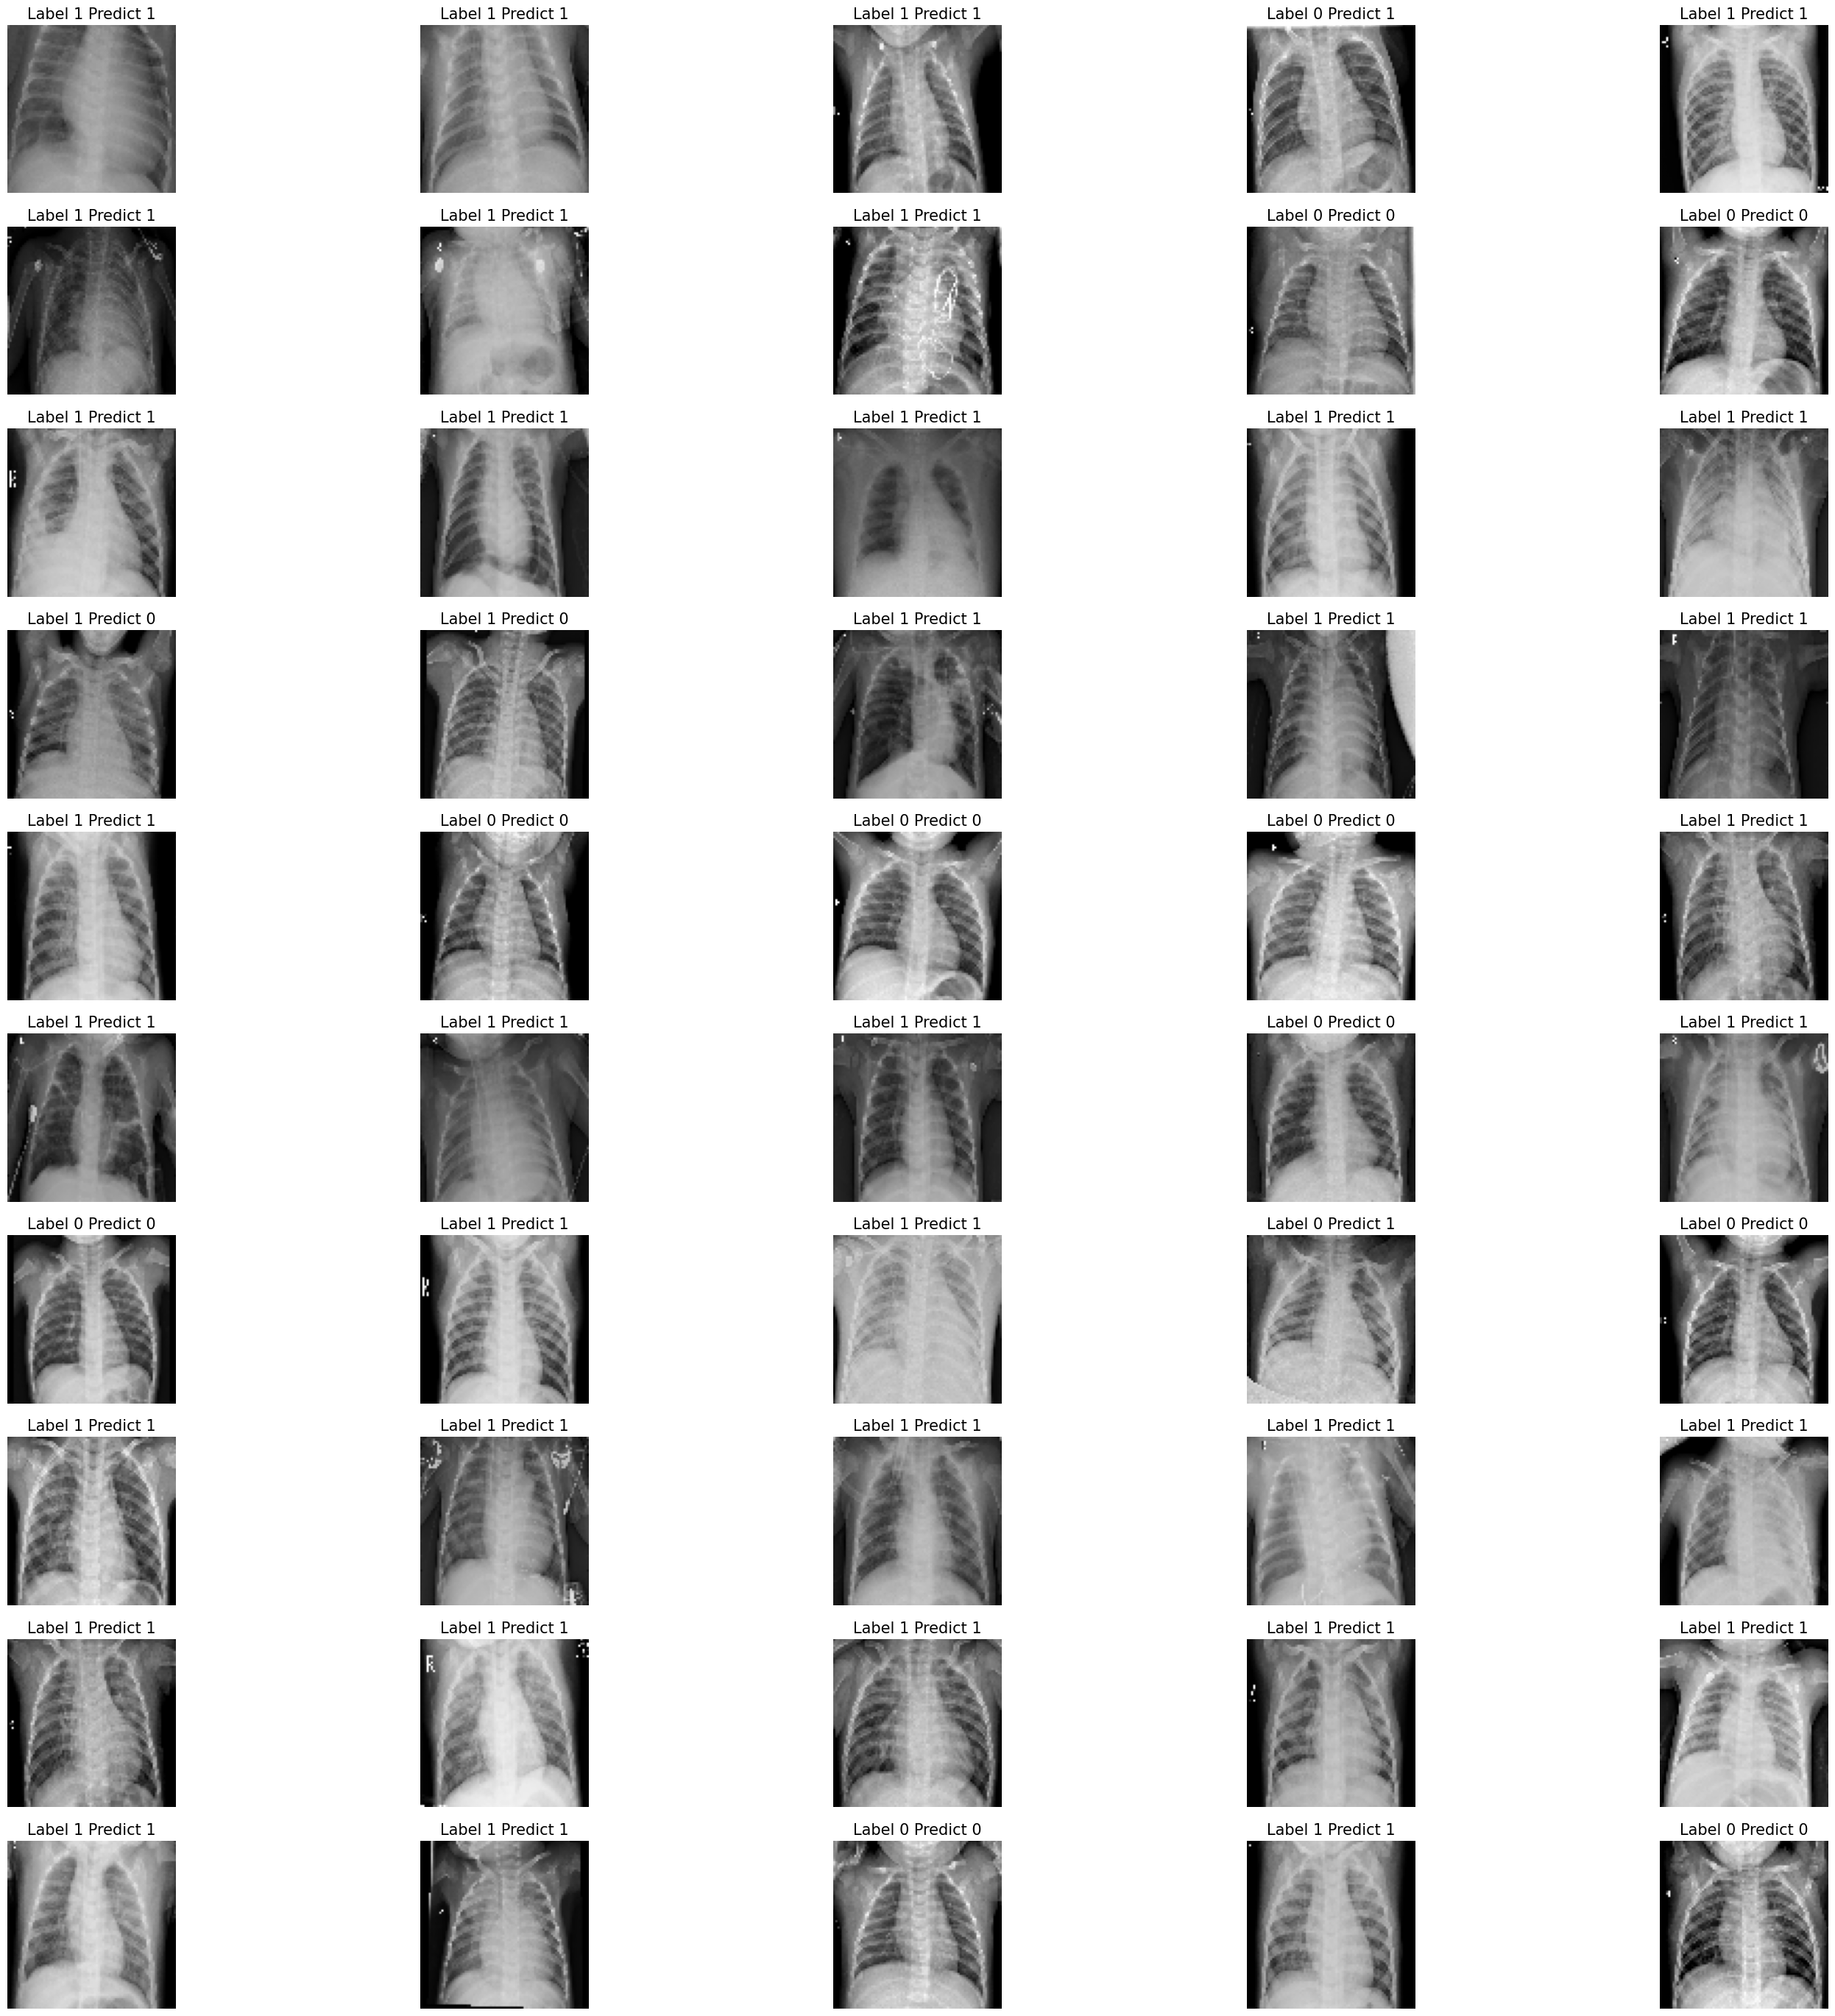

In [22]:
y_pred = model.predict(X_test)

# Round the predicted probabilities to the nearest integer
y_pred2 = np.rint(y_pred)

# Convert the rounded predicted probabilities to integers
y_pred2 = y_pred2.astype(int)

# Inverse transform the predicted labels
y_pred2 = label.inverse_transform(y_pred2)

# Inverse transform the true labels
y_test2 = label.inverse_transform(y_test)

# Plot the images
plt.figure(figsize=(35,35))
x = 1
for i in np.random.randint(0,len(X_test),50):
    plt.subplot(10, 5, x)
    plt.imshow(X_test[i])
    plt.title(f'Label {y_test2[i]} Predict {y_pred2[i]}', fontsize=15)
    plt.axis('off')    
    x += 1

In [23]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Define the metrics
precision = Precision(name='precision')
recall = Recall(name='recall')
accuracy = Accuracy(name='accuracy')

# Compile the model with the metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision, recall, accuracy])

# Train the model

# Evaluate the model on the testing data
loss, precision_val, recall_val, accuracy_val = model.evaluate(X_test, y_test)

# Print the metrics
print(f"Loss: {loss:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"Accuracy: {accuracy_val:.4f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0636 - loss: 0.1612 - precision: 0.9554 - recall: 0.9791
Loss: 0.1343
Precision: 0.9602
Recall: 0.9812
Accuracy: 0.0603
